In [45]:
import pandas as pd
import os
import sys
import numpy as np
from glob import glob

import cv2
import matplotlib.pyplot as plt

from tqdm import tqdm


def read_txt(path):
    with open(path, 'r') as f:
        lines = f.readlines()
        lines = [line.strip().split(',') for line in lines]
        return lines


def load_image(img_path):
    img_arr = cv2.imread(img_path)
    return cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

In [2]:
challenge_names = ['AU_Detection_Challenge',
                   'EXPR_Classification_Challenge',
                   'MTL_Challenge',
                   'VA_Estimation_Challenge']

# challenge_cols = ['AU_Detection_Cha']
splits = ['Train_Set', 'Validation_Set']
PATH = '/mnt/DATA2/congvm/Affwild2/Annotations/'
# CROP_PATHS = '/mnt/DATA2/congvm/Affwild2/cropped_aligned/'
# CROP_PATHS = '/mnt/DATA2/congvm/Affwild2/images/'
CROP_PATHS= '/mnt/DATA2/congvm/Affwild2/cropped_aligned'

In [8]:
# Load Training
fails = {}
success = {}

challenge_names = ["MTL_Challenge"]
for chname in challenge_names:
    if chname == "AU_Detection_Challenge":
        # TODO: Not finished
        cols_names = [
            "VideoID",
            "FrameID",
            "AU1",
            "AU2",
            "AU4",
            "AU6",
            "AU7",
            "AU10",
            "AU12",
            "AU15",
            "AU23",
            "AU24",
            "AU25",
            "AU26",
        ]
        path_to_load = os.path.join(*[PATH, chname, "Train_Set", "*.txt"])
        all_paths = glob(path_to_load)
        anno_data = []

        # For each video
        for path in tqdm(all_paths):
            lines = read_txt(path)

            # cols = lines[0]
            data = lines[1:]
            video_id = path.split("/")[-1].replace(".txt", "")

            all_frame_paths = glob(os.path.join(*[CROP_PATHS, video_id, "*.jpg"]))
            all_frame_paths.sort(key=lambda x: int(x.split("/")[-1].split(".")[0]))
            all_frame_paths = [fpath.split("/")[-1] for fpath in all_frame_paths]
            video_ids = [video_id] * len(all_frame_paths)

            # print(video_id, all_frame_paths[0:10], path, len(all_frame_paths), len(data))

            try:
                assert len(data) == len(all_frame_paths)
            except:
                fails.setdefault(chname, []).append(path)
                continue

            success.setdefault(chname, []).append(path)
            for vid, fid, d in zip(video_ids, all_frame_paths, data):
                _d = [vid, fid]
                _d.extend(d)
                anno_data.append(_d)

        df = pd.DataFrame(anno_data, columns=cols_names)
        break

    elif chname == "EXPR_Classification_Challenge":
        # TODO: Not finished
        cols_names = [
            "VideoID",
            "FrameID",
            "Neutral",
            "Anger",
            "Disgust",
            "Fear",
            "Happiness",
            "Sadness",
            "Surprise",
            "Other",
        ]
        path_to_load = os.path.join(*[PATH, chname, "Train_Set", "*.txt"])
        all_paths = glob(path_to_load)

    elif chname == "VA_Estimation_Challenge":
        # TODO: Not finished
        pass

    elif chname == "MTL_Challenge":
        print("> Convert MTL_Challenge to CSV file")
        path_to_load = os.path.join(*[PATH, chname, "*.txt"])
        cols_names = [
            "VideoID",
            "FrameID",
            "Valence",
            "Arousal",
            "Expression",
            "AU1",
            "AU2",
            "AU4",
            "AU6",
            "AU7",
            "AU10",
            "AU12",
            "AU15",
            "AU23",
            "AU24",
            "AU25",
            "AU26",
        ]
        all_paths = glob(path_to_load)  # Train split
        assert len(all_paths) == 2
        for path in all_paths:
            split = path.split("/")[-1].split("_")[0]
            lines = read_txt(path)
            # cols = lines[0]
            data = lines[1:]

            video_ids = [d[0].split("/")[0] for d in data]
            frame_ids = [d[0].split("/")[1] for d in data]

            assert len(video_ids) == len(data)
            anno_data = []
            missing_paths = []
            for vid, fid, d in zip(video_ids, frame_ids, data):
                img_path = os.path.join(*[CROP_PATHS, vid, fid])
                if not os.path.isfile(img_path):
                    missing_paths.append(img_path)
                    continue

                _d = [vid, fid]
                _d.extend(d[1:])
                anno_data.append(_d)
            print(
                f"> {split.upper()}: Cannot find {len(missing_paths)} paths ({len(missing_paths)/len(video_ids)})"
            )
            csv_path_to_save = f"/mnt/DATA2/congvm/Affwild2/mtl_{split}_anno.csv"
            print(f"CSV file is saved at {csv_path_to_save}")
            df = pd.DataFrame(anno_data, columns=cols_names)
            df.to_csv(csv_path_to_save, index=False)
    # break


> Convert MTL_Challenge to CSV file
> TRAIN: Cannot find 2809 paths (0.01933600875592849)
CSV file is saved at /mnt/DATA2/congvm/Affwild2/mtl_train_anno.csv
> VALIDATION: Cannot find 211 paths (0.007789714623251006)
CSV file is saved at /mnt/DATA2/congvm/Affwild2/mtl_validation_anno.csv


In [17]:
# Check MTL File
df = pd.read_csv('/mnt/DATA2/congvm/Affwild2/mtl_train_anno.csv')
df


,VideoID,FrameID,Valence,Arousal,Expression,AU1,AU2,AU4,AU6,AU7,AU10,AU12,AU15,AU23,AU24,AU25,AU26
0,426,00001.jpg,0.0,0.054,0,0,0,0,0,0,1,0,0,0,0,0,0
1,426,00003.jpg,0.0,0.077,0,0,0,0,0,0,0,0,0,0,0,1,0
2,426,00007.jpg,0.0,0.117,0,0,0,0,0,0,0,0,0,0,0,1,0
3,426,00050.jpg,0.0,0.156,-1,0,0,0,0,0,0,0,0,0,0,1,0
4,426,00060.jpg,0.0,0.156,4,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142459,video48,02518.jpg,-5.0,-5.000,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
142460,video48,02522.jpg,-5.0,-5.000,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
142461,video48,02526.jpg,-5.0,-5.000,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
142462,video48,02530.jpg,-5.0,-5.000,4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


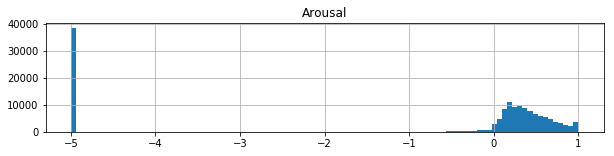

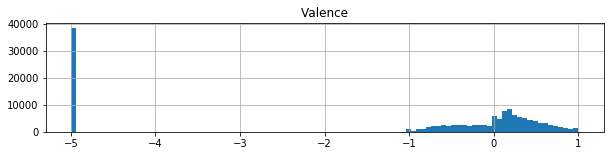

/home/lab/.virtualenvs/dl-py3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


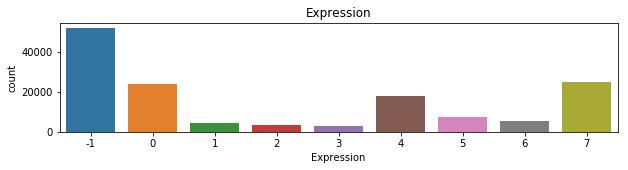

In [18]:
import seaborn as sns
plt.figure(figsize=(10, 2))
df.Arousal.hist(bins=100)
plt.title("Arousal")
plt.show()
plt.figure(figsize=(10, 2))
df.Valence.hist(bins=100)
plt.title("Valence")
plt.show()

plt.figure(figsize=(10, 2))
sns.countplot(df.Expression)
plt.title("Expression")
plt.show()


Image Shape:  (112, 112, 3)


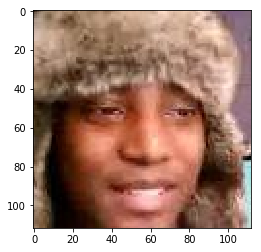

In [18]:
img_arr = cv2.imread('/mnt/DATA2/congvm/Affwild2/cropped_aligned/131/00344.jpg')[..., ::-1]
print('Image Shape: ', img_arr.shape)
plt.imshow(img_arr)

In [19]:
df.Valence = df.Valence.astype(np.float32)
df.Arousal = df.Arousal.astype(np.float32)

In [31]:
df_grouped = df.groupby(by="VideoID").agg(
    {"FrameID": list, "Valence": list, "Arousal": list, "Expression": list}
).reset_index()
df_grouped

,VideoID,FrameID,Valence,Arousal,Expression
0,1-30-1280x720,"[00001.jpg, 00020.jpg, 00022.jpg, 00024.jpg, 0...","[0.14800000190734863, 0.19499999284744263, 0.2...","[0.35199999809265137, 0.3619999885559082, 0.37...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
1,10-60-1280x720,"[00001.jpg, 00001.jpg, 00002.jpg, 00004.jpg, 0...","[0.14800000190734863, 0.14800000190734863, 0.2...","[-0.37599998712539673, -0.37599998712539673, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
2,10-60-1280x720_right,"[00305.jpg, 00309.jpg, 00313.jpg, 00317.jpg, 0...","[-5.0, -5.0, -5.0, 0.13300000131130219, 0.1640...","[-5.0, -5.0, -5.0, 0.0, 0.05400000140070915, 0...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
3,100-29-1080x1920,"[00001.jpg, 00002.jpg, 00002.jpg, 00004.jpg, 0...","[-0.1860000044107437, -0.4480000138282776, -0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.21899999678134918,...","[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1..."
4,101-30-1080x1920,"[00022.jpg, 00028.jpg, 00032.jpg, 00033.jpg, 0...","[0.0, 0.0, 0.0, 0.0, 0.0020000000949949026, 0....","[0.017000000923871994, 0.020999999716877937, 0...","[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1..."
...,...,...,...,...,...
252,video7,"[00001.jpg, 00005.jpg, 00009.jpg, 00013.jpg, 0...","[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....","[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....","[0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
253,video79,"[00001.jpg, 00007.jpg, 00013.jpg, 00014.jpg, 0...","[0.18700000643730164, 0.18700000643730164, 0.1...","[0.36899998784065247, 0.38499999046325684, 0.3...","[6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
254,video8,"[00044.jpg, 00075.jpg, 00079.jpg, 00083.jpg, 0...","[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....","[-5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5.0, -5....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
255,video93,"[00001.jpg, 00043.jpg, 00054.jpg, 00064.jpg, 0...","[0.6610000133514404, 0.7160000205039978, 0.716...","[0.550000011920929, 0.4950000047683716, 0.5659...","[4, 4, 4, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [25]:
# Load the seperated dataset
expr_train_paths = glob('/mnt/DATA2/congvm/Affwild2/Annotations/EXPR_Classification_Challenge/Train_Set/*.txt')
for path in expr_train_paths:
    d = read_txt(path)
    break
print(path)
len(d[1:])

/mnt/DATA2/congvm/Affwild2/Annotations/EXPR_Classification_Challenge/Train_Set/428.txt


3229

In [34]:
df_selected = df_grouped[df_grouped.VideoID == '428']
df_selected

,VideoID,FrameID,Valence,Arousal,Expression
